1. Compute word frequencies for each year. Exclude the stop words

In [6]:
from google.colab import drive 
drive.mount('Colab_Notebooks')

Drive already mounted at Colab_Notebooks; to attempt to forcibly remount, call drive.mount("Colab_Notebooks", force_remount=True).


In [7]:
#import pandas package
import pandas as pd
#load csv data into pandas dataframe
import numpy as np
#filtering stopwords
df=pd.read_csv('/content/Colab_Notebooks/MyDrive/2022.csv')
tweets=''
for tweet in df['tweet']:
  tweets += tweet + ' '
tweets

'@SpacePadreIsle In a way, this is free QA haha @teslaownersSV A beautiful home for life @SpacePadreIsle Some Starlink terminals near conflict areas were being jammed for several hours at a time. Our latest software update bypasses the jamming.  Am curious to see what’s next! @RationalEtienne @RogerYar Exactly @RogerYar All news sources are partially propaganda, some more than others Starlink has been told by some governments (not Ukraine) to block Russian news sources. We will not do so unless at gunpoint.  Sorry to be a free speech absolutist. SpaceX reprioritized to cyber defense &amp; overcoming signal jamming.   Will cause slight delays in Starship &amp; Starlink V2. @MichaelTChiass1 @Cole00708909 Who, me? 🙄 @ashleevance 🤣 @GailAlfarATX Exactly And also my sympathies to the great people of Russia, who do not want this 🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦 Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot react instantaneously to make up for 

In [10]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('word_tokenize')
all_words = word_tokenize(tweets)
stop_words = set(stopwords.words('english'))
stop_words.update(['@', ',', 'A', '.', ':', ';', '&', 'I', '!', '’', ')', '(', '🤣', '?', 'The', '“', '”', 'We', 'In', 'It', 'This', 'If'])
filtered_words = []
for word in all_words:
    if word not in stop_words:
        filtered_words.append(word)

word_analysis = nltk.FreqDist(filtered_words)
word_analysis.items()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


dict_items([('SpacePadreIsle', 10), ('way', 12), ('free', 6), ('QA', 2), ('haha', 6), ('teslaownersSV', 50), ('beautiful', 4), ('home', 6), ('life', 16), ('Some', 4), ('Starlink', 28), ('terminals', 10), ('near', 6), ('conflict', 2), ('areas', 2), ('jammed', 2), ('several', 8), ('hours', 2), ('time', 20), ('Our', 8), ('latest', 4), ('software', 14), ('update', 4), ('bypasses', 2), ('jamming', 4), ('Am', 4), ('curious', 2), ('see', 12), ('next', 14), ('RationalEtienne', 4), ('RogerYar', 4), ('Exactly', 16), ('All', 6), ('news', 8), ('sources', 4), ('partially', 2), ('propaganda', 2), ('others', 6), ('told', 6), ('governments', 2), ('Ukraine', 12), ('block', 4), ('Russian', 6), ('unless', 8), ('gunpoint', 2), ('Sorry', 4), ('speech', 2), ('absolutist', 2), ('SpaceX', 58), ('reprioritized', 2), ('cyber', 2), ('defense', 2), ('amp', 80), ('overcoming', 2), ('signal', 4), ('Will', 12), ('cause', 2), ('slight', 2), ('delays', 2), ('Starship', 16), ('V2', 2), ('MichaelTChiass1', 2), ('Cole007

2. Show top 10 words (for each year) by the highest value of word frequency

In [11]:
word_analysis.tabulate(10)

        https         Tesla WholeMarsBlog           amp        SpaceX teslaownersSV SawyerMerritt        people      BillyM2k      Starlink 
          118           108            84            80            58            50            36            32            30            28 


3. Plot histogram of word frequencies for each year

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


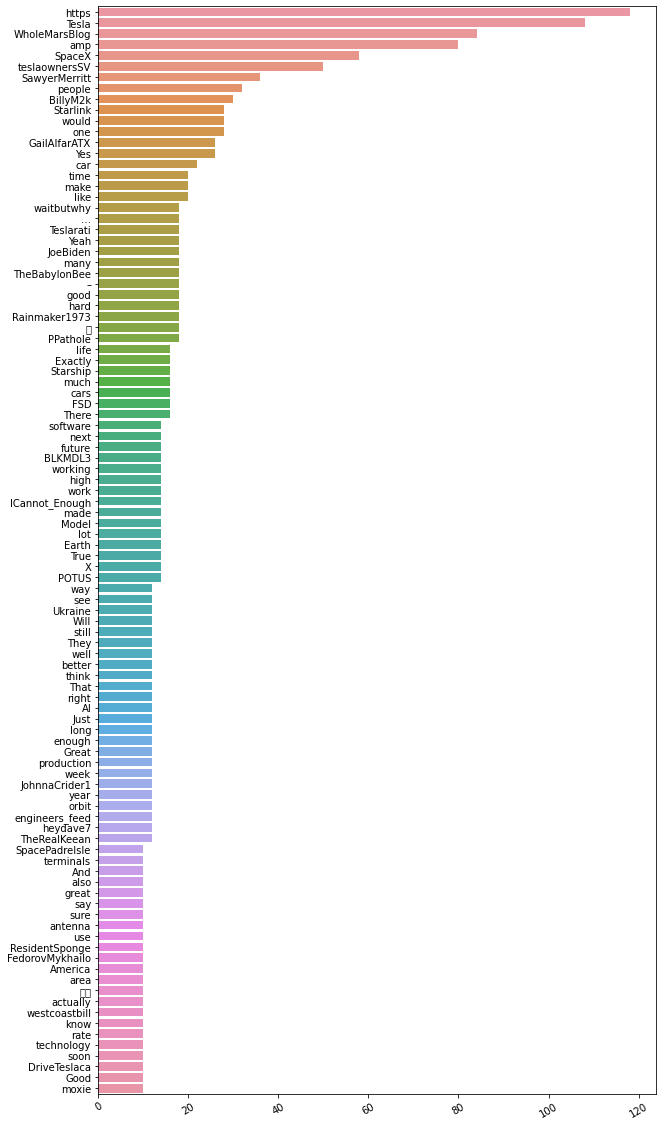

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
word_analysis_data_series = pd.Series(dict(word_analysis.most_common(100)))
# word_analysis_data_series = pd.Series(dict(word_analysis))

fig, ax = plt.subplots(figsize=(10,20))

word_frequency_plot = sns.barplot(y=word_analysis_data_series.index, x=word_analysis_data_series.values, ax=ax)
plt.xticks(rotation=30);

4. Use Zipf’s law and plot log-log plots of word frequencies and rank for each year


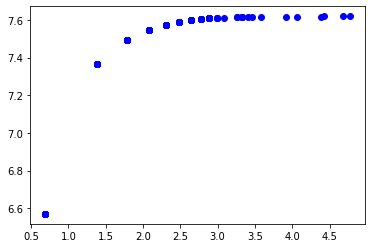

In [13]:
import scipy.stats as ss
import math
word_rank = ss.rankdata([freq for freq in word_analysis.values()])
log_freq = [math.log(freq) for freq in word_analysis.values()]
log_rank = [math.log(rank) for rank in word_rank]
plt.plot(log_freq, log_rank, 'bo')

5. Create bigram network graphs for each year

In [14]:
bigram_words = list(nltk.bigrams(filtered_words))
bigram_word_analysis = nltk.FreqDist(bigram_words)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  fon

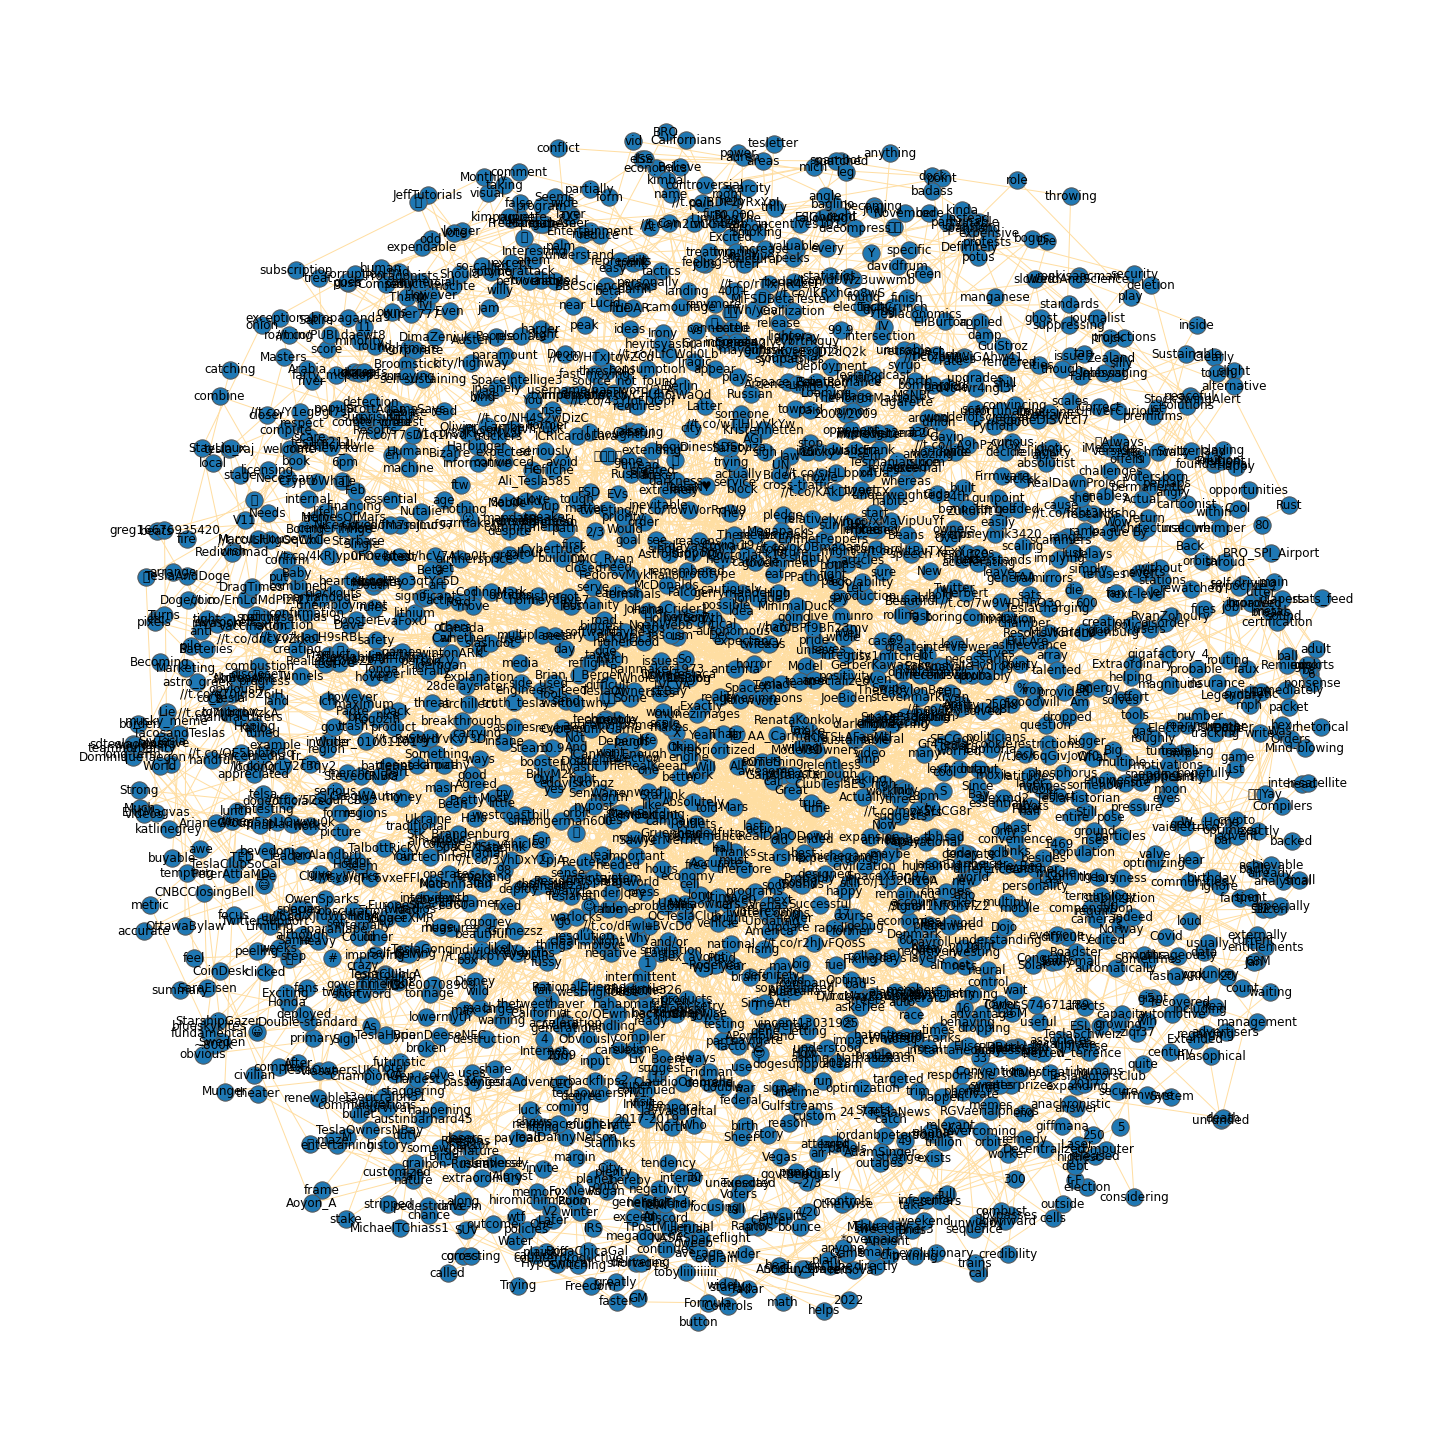

In [15]:
import networkx as nx
G = nx.Graph()
for index, row in bigram_word_analysis.most_common():
  G.add_weighted_edges_from([(index[0], index[1], row)])  

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
# nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50))
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()